# **1.Introduction**


The internet has become an important tool for educating, entertaining and source of income for many people. The main reason for analyzing Mkurugenzi channel is to get an overview of how fans interact with a YouTube channel content including views, likes and comments. Analyzing the performance of each category, seasons and episodes will be important for the owner of the channel and also potential advertisors. For instance;


 - The owner of the channel can use this analysis to understand which content to focus on more
 - Understand low performing content and maybe put foward strategies to improve fan engagement.
 - The owner can understand peak periods for his fans and advertise or promote his business or promotional content.
 - The owner can identify peak periods and pass important content (especially educational)
 - He can also use these numbers to bargain for better deals from promotors.


 - Promoters can also identoify ideal periods to advertise with channel

## a. Libraries

In [1]:
pip install isodate

In [2]:
# import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from datetime import datetime, timedelta
import re
import datetime
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
# define the numerical value format
pd.options.display.float_format = '{:,.2f}'.format

## b. Read File

In [4]:
# read csv file using pandas
file_path = '/content/YouTube_Channel.csv'
df = pd.read_csv(file_path,)

In [5]:
# first 5 rows
df.head()

,Title,Views,Likes,Comment,Duration,Time Posted
0,The Football War - Headline Hitters 9 Ep 9,82837,"3,512.00",373,PT35M28S,2025-02-02T17:15:07Z
1,Dust Is Constant - Mkurugenzi Minisodes 8 Ep 9,128020,"4,407.00",455,PT19M5S,2025-01-29T17:30:07Z
2,The Hopeless Romantic - Young & Stupid 9 Ep 4,209765,"5,844.00",540,PT37M6S,2025-01-26T17:15:06Z
3,The Wicked OffSpring - Mkurugenzi Minisodes 8 ...,217480,"6,544.00",660,PT33M28S,2025-01-22T17:30:06Z
4,The Z Boskovic Air Charters Story - Mkurugenzi...,182698,"5,087.00",374,PT17M26S,2025-01-12T17:15:00Z


In [6]:
# last 5 rows
df.tail()

,Title,Views,Likes,Comment,Duration,Time Posted
478,Mothers' Day Edition - Young & Stupid 1 Ep 5,231820,"9,732.00",1160,PT22M3S,2020-05-13T11:51:49Z
479,Robbed at Bible point - Young & Stupid 1 Ep 4,253983,"9,399.00",472,PT16M48S,2020-05-09T22:20:12Z
480,The Burner-Boys of RTI - Young & Stupid 1 Ep 3,227608,"7,969.00",465,PT14M23S,2020-05-09T20:31:18Z
481,A Psycho-Fan - Young & Stupid 1 Ep 2,544412,"12,957.00",654,PT14M13S,2020-05-09T20:13:04Z
482,Crushing on a Popstar - Young & Stupid 1 Ep 1,370037,"9,810.00",646,PT14M21S,2020-05-09T19:41:51Z


# **2. Data cleaning and Preprocessing**

In [7]:
# Data overview
rows, columns = df.shape
print(f'Rows: {rows}\nColumns: {columns}')

Rows: 483
Columns: 6


In [8]:
# data types and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        483 non-null    object 
 1   Views        483 non-null    int64  
 2   Likes        482 non-null    float64
 3   Comment      483 non-null    int64  
 4   Duration     483 non-null    object 
 5   Time Posted  483 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.8+ KB


- We note that all other columns have the right data types apart from duration and time posted
- We need to change them to be the right format

In [9]:
df['Duration']

,Duration
0,PT35M28S
1,PT19M5S
2,PT37M6S
3,PT33M28S
4,PT17M26S
...,...
478,PT22M3S
479,PT16M48S
480,PT14M23S
481,PT14M13S


In [10]:
# Iso date to extract duration in hrs, mins and secs
iso_duration = df['Duration']
df['Duration'] = df['Duration'].apply(isodate.parse_duration)


In [11]:
# convert timedelta into datatime
timedelta = df['Duration']
df['Duration'] = pd.to_datetime('2025-01-01') + df['Duration']

In [12]:
# Extract only date in the time posted
df['Time Posted'] = pd.to_datetime(df['Time Posted']).dt.date


In [13]:
#extract time
df['Duration'] = df['Duration'].dt.time

In [14]:
df['Duration'] = pd.to_datetime(df['Duration'], format= '%H:%M:%S').dt.time
df['Time Posted'] = pd.to_datetime(df['Time Posted'])

In [15]:
# overview again
df.head(3)

,Title,Views,Likes,Comment,Duration,Time Posted
0,The Football War - Headline Hitters 9 Ep 9,82837,"3,512.00",373,00:35:28,2025-02-02
1,Dust Is Constant - Mkurugenzi Minisodes 8 Ep 9,128020,"4,407.00",455,00:19:05,2025-01-29
2,The Hopeless Romantic - Young & Stupid 9 Ep 4,209765,"5,844.00",540,00:37:06,2025-01-26


In [16]:
df['Title']

,Title
0,The Football War - Headline Hitters 9 Ep 9
1,Dust Is Constant - Mkurugenzi Minisodes 8 Ep 9
2,The Hopeless Romantic - Young & Stupid 9 Ep 4
3,The Wicked OffSpring - Mkurugenzi Minisodes 8 ...
4,The Z Boskovic Air Charters Story - Mkurugenzi...
...,...
478,Mothers' Day Edition - Young & Stupid 1 Ep 5
479,Robbed at Bible point - Young & Stupid 1 Ep 4
480,The Burner-Boys of RTI - Young & Stupid 1 Ep 3
481,A Psycho-Fan - Young & Stupid 1 Ep 2


In [17]:
# write a function to extract 'Title, Category, Season, Episode from the title'
def extract_details (Title):

  full_pattern = r'^(.*?) -(.*?) (\d+) Ep (\d+)$'
  special_pattern = r'^(.*?) - (.*?)- (.*?) (\d+) Ep (\d+)$'
  missing_episode =  r'^(.*?) -(.*?) (\d+)$'
  missing_season =  r'^(.*?) -(.*?) Ep (\d+)$'
  missing_category =  r'^(.*?) (\d+) Ep (\d+)$'



  match = re.match(full_pattern, Title)

  if match:
   combined_title = match.group(1)
   category =  match.group(2)
   season = int(match.group(3))
   episode = int(match.group(4))
   return combined_title, category, season, episode

   match = re.match(special_pattern, Title)

  if match:
    combined_title = f'{match.group(1)} - {match.group(2)}'
    category = match.group(3)
    season = int(match.group(4))
    episode = int(match.group(5))
    return combined_title, category, season, episode


    # for missing epoisode
  match = re.match(missing_episode, Title)
  if match:
    combined_title = match.group(1)
    category =  match.group(2)
    season = int(match.group(3))

    return combined_title, category, season,  None

    # missing season
  match = re.match(missing_season, Title)
  if match:
   combined_title = match.group(1)
   category =  match.group(2)
   episode = int(match.group(3))
   return combined_title, category, None, episode


    #missing category
  match = re.match(missing_category, Title)
  if match:
   combined_title = match.group(1)
   season = int(match.group(2))
   episode = int(match.group(3))
   return combined_title, None, season, episode


    #If no match at all

  else:
    return None, None, None, None


In [18]:
df[['Title_Name', 'Category', 'Season', 'Episode']] = df['Title'].apply(lambda t: pd.Series(extract_details(t)))

In [19]:
#del df['Title_Name']

In [20]:
df.sample(10)

,Title,Views,Likes,Comment,Duration,Time Posted,Title_Name,Category,Season,Episode
206,Mkurugenzi remembers his child hood adventures,42712,"2,908.00",53,00:00:56,2023-03-01,None,None,NaN,NaN
225,High school Letters before social media,6201,335.00,15,00:00:54,2023-01-31,None,None,NaN,NaN
403,BENSOUL - Celebrity First Encounters 2 Ep 9,95089,"3,479.00",466,00:20:57,2021-02-10,BENSOUL,Celebrity First Encounters,2.00,9.00
214,Abel Mutua's advice to the youth,74741,"5,455.00",74,00:01:00,2023-02-11,None,None,NaN,NaN
228,Student's plan to burn dormitory,7802,314.00,12,00:00:33,2023-01-27,None,None,NaN,NaN
141,A One In A Million Chance - Mkurugenzi Minisod...,195362,"4,385.00",349,00:17:48,2023-07-26,A One In A Million Chance,Mkurugenzi Minisode,3.00,12.00
30,Transworld Airline Flight 800 - Headline Hitte...,270810,"6,036.00",413,00:37:59,2024-10-07,Transworld Airline Flight 800,Headline Hitters,9.00,3.00
302,Buried Alive - Chile Mine Rescue - Headline Hi...,221170,"6,224.00",440,00:39:48,2022-08-08,Buried Alive,Chile Mine Rescue - Headline Hitters,5.00,3.00
360,Ku-Tender Na Kutendwa - Young & Stupid 4 Ep 6,306340,"6,501.00",293,00:31:58,2021-08-24,Ku-Tender Na Kutendwa,Young & Stupid,4.00,6.00
221,Celebrity first encounters - Otile Brown,6471,311.00,2,00:00:57,2023-02-03,None,None,NaN,NaN


In [21]:
new_order = ['Title', 'Title_Name', 'Category', 'Season', 'Episode','Views', 'Likes', 'Comment', 'Duration', 'Time Posted' ]

In [22]:
df = df[new_order]

In [23]:
df.sample(10)

,Title,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted
225,High school Letters before social media,None,None,NaN,NaN,6201,335.00,15,00:00:54,2023-01-31
129,For Papers Or For Worse Part 2 - Mkurugenzi Di...,For Papers Or For Worse Part 2,Mkurugenzi Diastories,2.00,12.00,261304,"5,142.00",670,00:42:41,2023-09-10
116,Washed By A Stranger - Young & Stupid 7 Ep 5,Washed By A Stranger,Young & Stupid,7.00,5.00,279318,"5,951.00",412,00:29:06,2023-11-01
270,THE LIFE HACK - Securing Your Future - Part 1.,None,None,NaN,NaN,30369,459.00,23,00:31:47,2022-12-01
112,Comrade To Convict In 4 Days - Young & Stupid ...,None,None,NaN,NaN,361407,"7,101.00",558,00:39:49,2023-11-17
143,"Lost In The Skies, Aloha Airlines Flight 243 -...",None,None,NaN,NaN,367260,"6,606.00",529,00:39:53,2023-07-22
278,Return Tickets - Mkurugenzi Diastories Ep 5,Return Tickets,Mkurugenzi Diastories Ep,5.00,NaN,214229,"5,056.00",462,00:26:36,2022-11-07
7,It’s A Sign - Mkurugenzi Minisodes 8 Ep 5,None,None,NaN,NaN,227946,"4,961.00",430,00:23:07,2025-01-01
383,Raundi mwenda - Young & Stupid 3 Ep 7,Raundi mwenda,Young & Stupid,3.00,7.00,282720,"7,454.00",655,00:26:36,2021-05-04
147,A Victim Of To Serve And Protect’ - Young & St...,A Victim Of To Serve And Protect’,Young & Stupid,6.00,12.00,433605,"6,803.00",509,00:48:15,2023-07-12


In [24]:
# check missing values
df.isna().sum()

,0
Title,0
Title_Name,148
Category,153
Season,148
Episode,175
Views,0
Likes,1
Comment,0
Duration,0
Time Posted,0


- Most missing values are trailers, vids below 1 minute
- So its better if i dropped them since they are not relevent is this analysis

In [25]:
df = df.dropna()

In [26]:
df.sample(10)

,Title,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted
273,Grand Theft Auto - Young And Stupid 5 Ep 7,Grand Theft Auto,Young And Stupid,5.00,7.00,437567,"8,793.00",532,00:39:15,2022-11-23
175,The Sim Swap Scam - Mkurugenzi Minisodes 3 Ep 8,The Sim Swap Scam,Mkurugenzi Minisodes,3.00,8.00,161491,"4,293.00",416,00:12:10,2023-05-18
40,Serial Swindler - Young & Stupid 8 Ep 10,Serial Swindler,Young & Stupid,8.00,10.00,320881,"6,694.00",561,00:32:37,2024-09-01
382,Silencing A Statesman - J.M. Kariuki - Headlin...,Silencing A Statesman,J.M. Kariuki - Headline Hitters,2.00,7.00,667426,"14,104.00",1186,00:34:26,2021-05-07
92,How To Ignore Red Flags - Young & Stupid 7 Ep 12,How To Ignore Red Flags,Young & Stupid,7.00,12.00,346719,"7,634.00",992,00:42:16,2024-02-11
390,Titanic (The Key Error) - Headline Hitters 2 Ep 3,Titanic (The Key Error),Headline Hitters,2.00,3.00,319359,"7,370.00",777,00:25:57,2021-04-09
355,The Aquanaut - Trapped Underwater - Headline H...,The Aquanaut,Trapped Underwater - Headline Hitters,3.00,8.00,287325,"6,896.00",475,00:33:15,2021-09-10
200,A Nurse-ty Con game - Young & Stupid 5 Ep 11,A Nurse-ty Con game,Young & Stupid,5.00,11.00,289860,"6,172.00",499,00:28:44,2023-03-13
116,Washed By A Stranger - Young & Stupid 7 Ep 5,Washed By A Stranger,Young & Stupid,7.00,5.00,279318,"5,951.00",412,00:29:06,2023-11-01
386,Garissa College Attack - Headline Hitters 2 Ep 5,Garissa College Attack,Headline Hitters,2.00,5.00,651475,"14,241.00",1073,00:31:00,2021-04-23


In [27]:
# check datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 482
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        303 non-null    object        
 1   Title_Name   303 non-null    object        
 2   Category     303 non-null    object        
 3   Season       303 non-null    float64       
 4   Episode      303 non-null    float64       
 5   Views        303 non-null    int64         
 6   Likes        303 non-null    float64       
 7   Comment      303 non-null    int64         
 8   Duration     303 non-null    object        
 9   Time Posted  303 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 26.0+ KB


In [28]:
# convert likes to int
df['Likes'].replace('N/A', 0, inplace=True)
df['Likes'] = df['Likes'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 482
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        303 non-null    object        
 1   Title_Name   303 non-null    object        
 2   Category     303 non-null    object        
 3   Season       303 non-null    float64       
 4   Episode      303 non-null    float64       
 5   Views        303 non-null    int64         
 6   Likes        303 non-null    int64         
 7   Comment      303 non-null    int64         
 8   Duration     303 non-null    object        
 9   Time Posted  303 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 26.0+ KB


In [30]:
df.sample(10)

,Title,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted
136,The Kung-Fu Mums - Young & Stupid 7 Ep 1,The Kung-Fu Mums,Young & Stupid,7.00,1.00,330626,5744,618,00:29:47,2023-08-11
119,Diaspora Pains - Mkurugenzi Minisodes 4 Ep 5,Diaspora Pains,Mkurugenzi Minisodes,4.00,5.00,220835,4934,356,00:14:07,2023-10-15
58,A Friend Of The Bottle - Mkurugenzi Minisodes ...,A Friend Of The Bottle,Mkurugenzi Minisodes,6.00,8.00,233303,5371,479,00:20:41,2024-06-21
239,WINNIE RUBY - Celeb First Encounters 1 Ep 9,WINNIE RUBY,Celeb First Encounters,1.00,9.00,4125,174,4,00:00:30,2023-01-19
473,NYASHINSKI - Celebrity First Encounters 1 Ep 2,NYASHINSKI,Celebrity First Encounters,1.00,2.00,191029,10610,1258,00:11:58,2020-06-06
463,DJ MO - Celebrity First Encounters 1 Ep 8,DJ MO,Celebrity First Encounters,1.00,8.00,140195,7668,974,00:20:33,2020-07-08
401,Special episode - Celebrity First Encounters 2...,Special episode,Celebrity First Encounters,2.00,10.00,117398,4123,562,00:36:14,2021-02-17
59,Neurosurgeon on DeathRow - Mkurugenzi Minisode...,Neurosurgeon on DeathRow,Mkurugenzi Minisodes,6.00,7.00,248101,6388,712,00:17:16,2024-06-12
103,Parent For Hire - Young & Stupid 7 Ep 9,Parent For Hire,Young & Stupid,7.00,9.00,532849,8745,920,00:46:42,2023-12-17
149,The Phone-y Tactics That Solved A Murder - You...,The Phone-y Tactics That Solved A Murder,Young And Stupid,6.00,11.00,438037,7356,620,00:43:37,2023-07-07


**CATEGORIES**

In [31]:
# remove space, use lower case and remove symbols
#df['Category'] = df['Category'].str.strip()
#df['Category'] = df['Category'].str.lower()
df['Category'] = df['Category'].str.replace(r'^[^a-zA-Z]+', '', regex=True)

In [32]:
#check unique categories
df['Category'].unique()

array(['Headline Hitters', 'Mkurugenzi Minisodes', 'Young & Stupid',
       'Mkurugenzi Minisode', 'Mkurugenzi Diastories',
       'Real Quick - Mkurugenzi Minisodes', 'Diastories',
       'Young And Stupid', 'Omyra Sanchez Headline Hitters',
       'Celeb First Encounters', 'Celebrity First Encounters',
       'Chile Mine Rescue - Headline Hitters',
       'Gone in 90 Seconds - Headline Hitters',
       'Miraculous Fall From The Sky : High on Heroines',
       'High On Heroines', 'Trapped Underwater - Headline Hitters',
       'The Six Hour Take Over - Headline Hitters',
       'Paradise Lost  - Young & Stupid',
       'J.M. Kariuki - Headline Hitters', 'Young and Stupid',
       "OJ's Perspective (Part 2) - Young & Stupid",
       "OJ's Perspective  (Part 1) - Young & Stupid"], dtype=object)

In [33]:
map_category = {'Young And Stupid' : 'Young & Stupid',
                'Young & Stupid': 'Young & Stupid',
                'Young and Stupid':'Young & Stupid',
                'Mkurugenzi Minisode': 'Mkurugenzi Minisodes',
                'Mkurugenzi Minisodes' :'Mkurugenzi Minisodes',
                'Diastories' :  'Mkurugenzi Diastories',
                'Mkurugenzi Diastories': 'Mkurugenzi Diastories',

                'Celeb First Encounters': 'Celebrity First Encounters',
                'Celebrity First Encounters': 'Celebrity First Encounters',

                'Headline Hitters' : 'Headline Hitters',
                'Mkurugenzi Minisodes' : 'Mkurugenzi Minisodes',
                'Real Quick - Mkurugenzi Minisodes': 'Mkurugenzi Minisodes',
                'Omyra Sanchez Headline Hitters' : 'Headline Hitters',
                'Chile Mine Rescue - Headline Hitters': 'Headline Hitters',
                'Gone in 90 Seconds - Headline Hitters': 'Headline Hitters',
                'Miraculous Fall From The Sky : High on Heroines': 'Headline Hitters',
                'Headline Hitters': 'Headline Hitters',
                'High On Heroines': 'Headline Hitters',
                'Trapped Underwater - Headline Hitters': 'Headline Hitters',
                'The Six Hour Take Over - Headline Hitters':'Headline Hitters',
                'Paradise Lost  - Young & Stupid': 'Young & Stupid',
                'J.M. Kariuki - Headline Hitters' :'Headline Hitters',
                "OJ's Perspective (Part 2) - Young & Stupid" : 'Young & Stupid',
                "OJ's Perspective  (Part 1) - Young & Stupid":'Young & Stupid'








                 }



In [34]:
#map the dict
df['Category'] = df['Category'].map(map_category)

In [35]:
df['Category'].isna().sum()

0

In [36]:
df.sample(15)

,Title,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted
357,Pilot Suicide - Headline Hitters 3 Ep 7,Pilot Suicide,Headline Hitters,3.00,7.00,259706,6350,371,00:22:53,2021-09-03
66,Emiliano Sala - Headline Hitters 8 Ep 8,Emiliano Sala,Headline Hitters,8.00,8.00,352072,6423,944,00:40:10,2024-05-19
157,The Tanzanite Script - Mkurugenzi Diastories 2...,The Tanzanite Script,Mkurugenzi Diastories,2.00,3.00,224663,4297,385,00:26:38,2023-06-13
328,Vesna Vulovic - Miraculous Fall From The Sky :...,Vesna Vulovic,Headline Hitters,1.00,8.00,213795,5053,318,00:24:06,2022-04-01
54,"For Papers or For Worse, Australia - Young & S...","For Papers or For Worse, Australia",Young & Stupid,8.00,7.00,312451,6385,437,00:31:45,2024-07-07
479,Robbed at Bible point - Young & Stupid 1 Ep 4,Robbed at Bible point,Young & Stupid,1.00,4.00,253983,9399,472,00:16:48,2020-05-09
104,The Chai Cartel - Mkurugenzi Minisodes 4 Ep 11,The Chai Cartel,Mkurugenzi Minisodes,4.00,11.00,283054,7444,636,00:28:42,2023-12-13
460,CELESTINE NDINDA - Celeb First Encounters 1 Ep 10,CELESTINE NDINDA,Celebrity First Encounters,1.00,10.00,167745,8970,1192,00:21:39,2020-07-18
78,The Dalehurst Train Disaster - Headline Hitte...,The Dalehurst Train Disaster,Headline Hitters,8.00,4.00,329371,6424,437,00:36:28,2024-03-31
363,Hudson River Miracle - Headline Hitters 3 Ep 4,Hudson River Miracle,Headline Hitters,3.00,4.00,274711,7403,531,00:28:38,2021-08-13


In [37]:
# check unique categories
df['Category'].unique()

array(['Headline Hitters', 'Mkurugenzi Minisodes', 'Young & Stupid',
       'Mkurugenzi Diastories', 'Celebrity First Encounters'],
      dtype=object)

- Now we have 5 categories

  -Headline Hitters

  -Mkurugenzi Minisodes

  -Young & Stupid

  -Mkurugenzi Diastories
  
  -Celebrity First Encounters

**SEASONS**

In [38]:
# check unique seasons
df['Season'].unique()

array([9., 8., 7., 3., 6., 5., 4., 2., 1.])

- There are 9 seasons

In [39]:
# lets see the unique seasons for each category
#1. Headline Hitters
df[df['Category']=='Headline Hitters']['Season'].unique()

array([9., 8., 7., 6., 5., 4., 1., 3., 2.])

- Headline Hitters has 9 seasons

In [40]:
#2. Young & Stupid
df[df['Category']=='Young & Stupid']['Season'].unique()

array([9., 8., 7., 6., 5., 2., 1., 4., 3.])

- Young & Stupid has 9 seasons

In [41]:
#3. Mkurugenzi Minisodes
df[df['Category']=='Mkurugenzi Minisodes']['Season'].unique()

array([8., 7., 6., 5., 4., 3., 2., 1.])

- Mkurugenzi Minisodes has 8 seasons

In [42]:
#4. Mkurugenzi Diastories
df[df['Category']=='Mkurugenzi Diastories']['Season'].unique()

array([3., 2.])

- Mkurugenzi Diastories has

In [43]:
#5. Celebrity First Encounters
df[df['Category']=='Celebrity First Encounters']['Season'].unique()

array([1., 2.])

- Celebrity First Encounters has 2 seasons

In [44]:
# Summary of categories
unique_seasons = df.groupby('Category')['Season'].unique().reset_index()
unique_seasons.rename(columns = {'Season' : 'Seasons'}, inplace=True)
unique_seasons


,Category,Seasons
0,Celebrity First Encounters,"[1.0, 2.0]"
1,Headline Hitters,"[9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 1.0, 3.0, 2.0]"
2,Mkurugenzi Diastories,"[3.0, 2.0]"
3,Mkurugenzi Minisodes,"[8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]"
4,Young & Stupid,"[9.0, 8.0, 7.0, 6.0, 5.0, 2.0, 1.0, 4.0, 3.0]"


In [45]:
# Delete Title since we have title name
del df['Title']

In [46]:
df.sample(10)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted
103,Parent For Hire,Young & Stupid,7.00,9.00,532849,8745,920,00:46:42,2023-12-17
297,American Nightmare In Somalia,Headline Hitters,5.00,4.00,321756,8893,769,00:36:17,2022-08-31
387,Sema Car-meumana,Young & Stupid,3.00,5.00,332157,8053,853,00:32:26,2021-04-20
473,NYASHINSKI,Celebrity First Encounters,1.00,2.00,191029,10610,1258,00:11:58,2020-06-06
338,Youngest African President Ever,Headline Hitters,4.00,3.00,309345,7982,443,00:26:01,2022-01-21
378,Cash At The End Of The Tunnel,Headline Hitters,2.00,9.00,411943,8932,503,00:30:46,2021-05-21
318,Man Down,Mkurugenzi Minisodes,1.00,5.00,212990,7223,503,00:18:50,2022-05-26
117,Saved By A Gadget,Mkurugenzi Minisodes,4.00,6.00,246121,6525,385,00:20:09,2023-10-27
73,Prison Break: William Leslie,Headline Hitters,8.00,6.00,735409,14583,939,00:58:38,2024-04-21
100,The Master Better!,Young & Stupid,7.00,10.00,426356,7975,574,00:34:51,2023-12-27


In [47]:
df.shape

(303, 9)

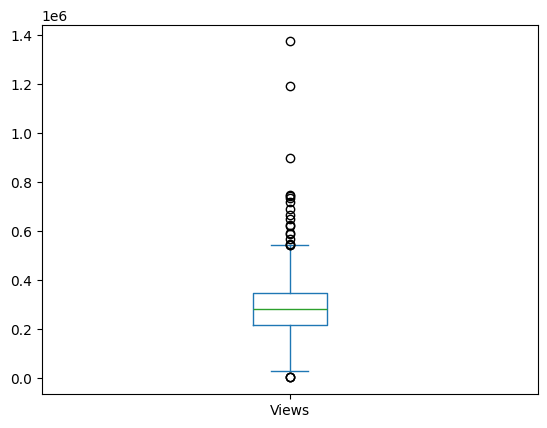

In [48]:
df['Views'].plot(kind='box')
plt.show()

In [49]:
df['Views'].describe()

,Views
count,303.00
mean,"307,297.21"
std,"153,240.33"
min,"4,125.00"
25%,"217,102.00"
50%,"282,720.00"
75%,"347,909.50"
max,"1,373,998.00"


In [50]:
df['Views_capped'] = df['Views']

In [51]:
df.head(2)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted,Views_capped
0,The Football War,Headline Hitters,9.00,9.00,82837,3512,373,00:35:28,2025-02-02,82837
1,Dust Is Constant,Mkurugenzi Minisodes,8.00,9.00,128020,4407,455,00:19:05,2025-01-29,128020


In [52]:
#  treat outliers for the views
capped_views = df['Views_capped']

#calculate IQR
Q1 = capped_views.quantile(0.25)
Q3 = capped_views.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (capped_views<lower_bound)|(capped_views >upper_bound)
print(outliers.sum())

21


In [53]:
capped_views = capped_account_bal = capped_views.clip(lower=lower_bound, upper=upper_bound)
capped_views.describe()

,Views_capped
count,303.00
mean,"296,689.76"
std,"115,694.69"
min,"20,890.75"
25%,"217,102.00"
50%,"282,720.00"
75%,"347,909.50"
max,"544,120.75"


<Axes: >

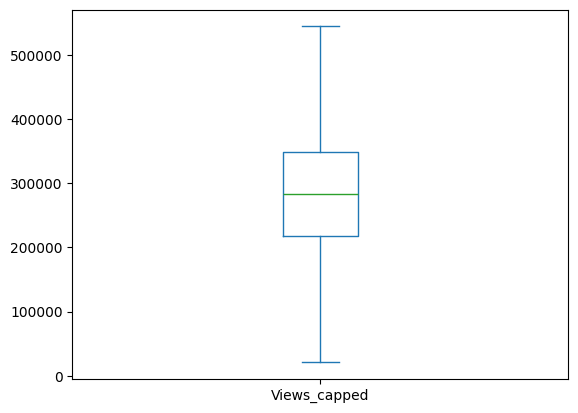

In [54]:
capped_views.plot(kind='box')

# **3.Exploratory Data Analysis**

- Out of the 482 videos extracted, only 303 are correctly posted for analysis

In [55]:
#compare the numbers for each category
df.groupby(['Category'])[['Views', 'Likes', 'Comment']].agg('sum').sort_values(by='Views', ascending=False).reset_index()

,Category,Views,Likes,Comment
0,Headline Hitters,38499368,770216,58026
1,Young & Stupid,30086087,758095,65957
2,Mkurugenzi Minisodes,17318604,448429,34965
3,Mkurugenzi Diastories,4286936,84178,7611
4,Celebrity First Encounters,2920061,142994,17071


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 482
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title_Name    303 non-null    object        
 1   Category      303 non-null    object        
 2   Season        303 non-null    float64       
 3   Episode       303 non-null    float64       
 4   Views         303 non-null    int64         
 5   Likes         303 non-null    int64         
 6   Comment       303 non-null    int64         
 7   Duration      303 non-null    object        
 8   Time Posted   303 non-null    datetime64[ns]
 9   Views_capped  303 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 26.0+ KB


In [57]:
df[['Season', 'Episode']] =  df[['Season', 'Episode']].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 482
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title_Name    303 non-null    object        
 1   Category      303 non-null    object        
 2   Season        303 non-null    int64         
 3   Episode       303 non-null    int64         
 4   Views         303 non-null    int64         
 5   Likes         303 non-null    int64         
 6   Comment       303 non-null    int64         
 7   Duration      303 non-null    object        
 8   Time Posted   303 non-null    datetime64[ns]
 9   Views_capped  303 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 26.0+ KB


**Category performance**




In [59]:
cat_performance = df.groupby('Category')[['Views', 'Likes', 'Comment']].agg('sum').reset_index()
cat_performance

,Category,Views,Likes,Comment
0,Celebrity First Encounters,2920061,142994,17071
1,Headline Hitters,38499368,770216,58026
2,Mkurugenzi Diastories,4286936,84178,7611
3,Mkurugenzi Minisodes,17318604,448429,34965
4,Young & Stupid,30086087,758095,65957


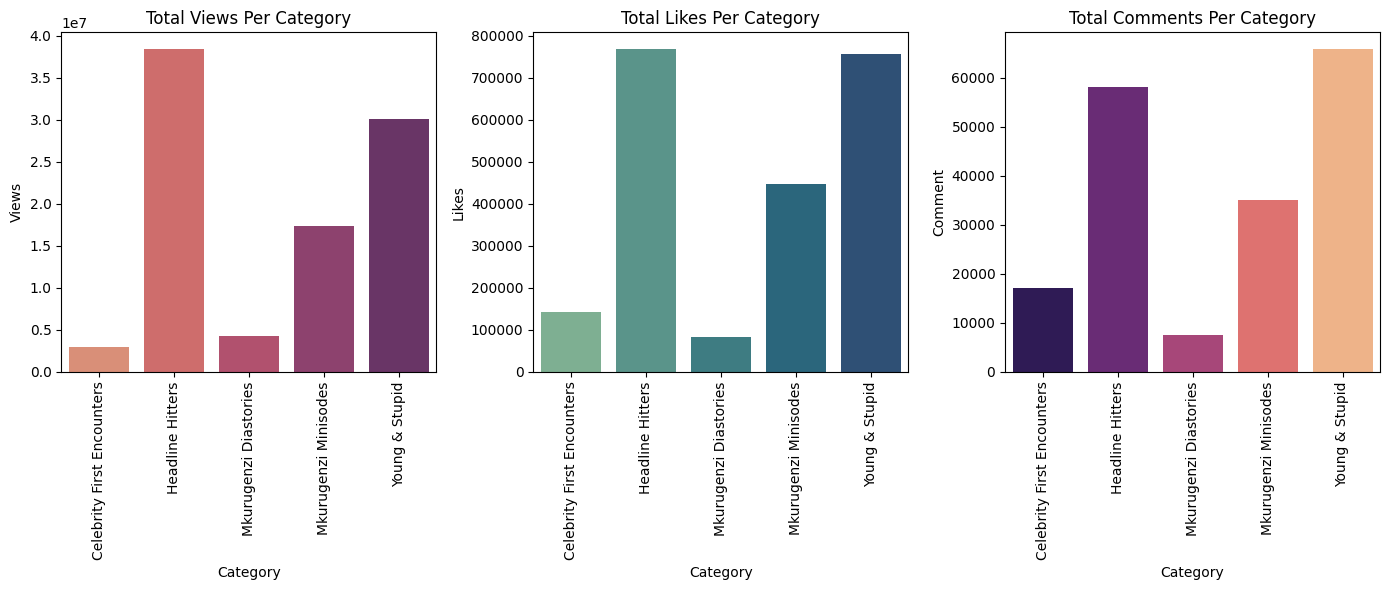

In [60]:
#Visualizing category performance

plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
sns.barplot(data=cat_performance, x = 'Category', y= 'Views', palette='flare')
plt.title('Total Views Per Category')
plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
sns.barplot(data=cat_performance, x = 'Category', y= 'Likes', palette='crest')
plt.title('Total Likes Per Category')
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
sns.barplot(data=cat_performance, x = 'Category', y= 'Comment', palette='magma')
plt.title('Total Comments Per Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('Mkuru.png', dpi=300)
plt.show()


- In a general observation, headline hitters gets more views and likes and second most comments from the channel fans.
- Young & Stupid has the most comments indicating that most fans find Abel's story telling on young and stupid more catching and perhaps funny
- Mkurugenzi Minisodes enjoys some relatively high numbers but not as many as those of headline hitters and young & Stupid
- Celebrity First Encounters also didnt do that well
- Mkurugenzi Diastories had the lowest numbers perhalps many people do not resonate with diaspora stories or maybe its a new inclusion

**Season Performance Per Category**

In [61]:
season_performance = df.groupby(['Category', 'Season'])[['Views', 'Likes', 'Comment']].agg('sum').reset_index()
season_performance

,Category,Season,Views,Likes,Comment
0,Celebrity First Encounters,1,1911133,101412,11935
1,Celebrity First Encounters,2,1008928,41582,5136
2,Headline Hitters,1,4702314,109460,9021
3,Headline Hitters,2,3597486,85003,6914
4,Headline Hitters,3,4730227,88151,5005
5,Headline Hitters,4,6476371,121546,7589
6,Headline Hitters,5,3817423,86296,5888
7,Headline Hitters,6,2934795,45330,3798
8,Headline Hitters,7,5525776,104130,9231
9,Headline Hitters,8,4673007,85269,7084


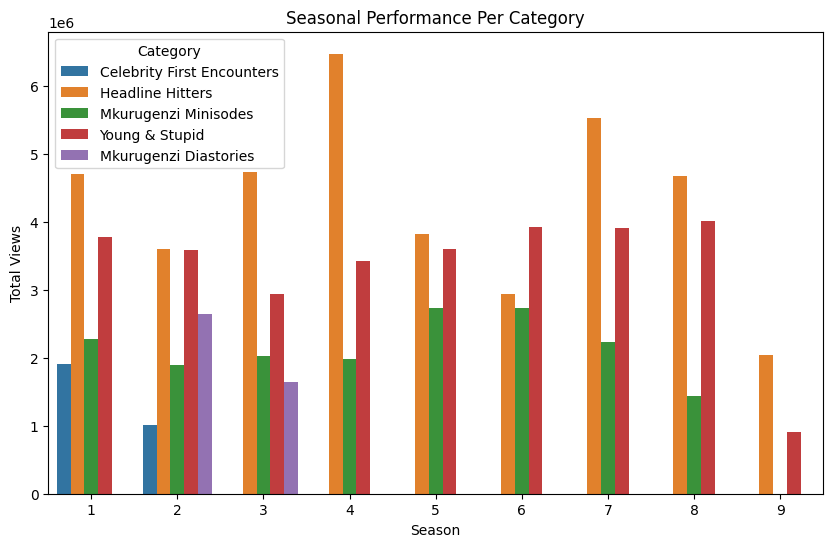

In [62]:
# Visualization of season performance

plt.figure(figsize = (10, 6))
sns.barplot(data = season_performance, x='Season', y='Views', hue='Category')
plt.title('Seasonal Performance Per Category')
plt.xlabel('Season')
plt.ylabel('Total Views')
plt.legend(title='Category')
plt.show()

- Headline Hitters enjoys more views across all the seasons followed by Young & Stupid as noted earlier

**Episode Performance**

In [63]:
episode_perf = df.groupby(['Category', 'Season', 'Episode'])[['Views', 'Likes', 'Comment']].agg('sum').reset_index()
episode_perf

,Category,Season,Episode,Views,Likes,Comment
0,Celebrity First Encounters,1,1,162056,8298,744
1,Celebrity First Encounters,1,2,198920,10968,1264
2,Celebrity First Encounters,1,3,145649,8024,797
3,Celebrity First Encounters,1,4,193221,9906,1370
4,Celebrity First Encounters,1,5,209863,10240,1334
...,...,...,...,...,...,...
291,Young & Stupid,8,11,324994,6307,432
292,Young & Stupid,8,12,335916,6536,375
293,Young & Stupid,9,2,407102,7788,768
294,Young & Stupid,9,3,288531,6280,533


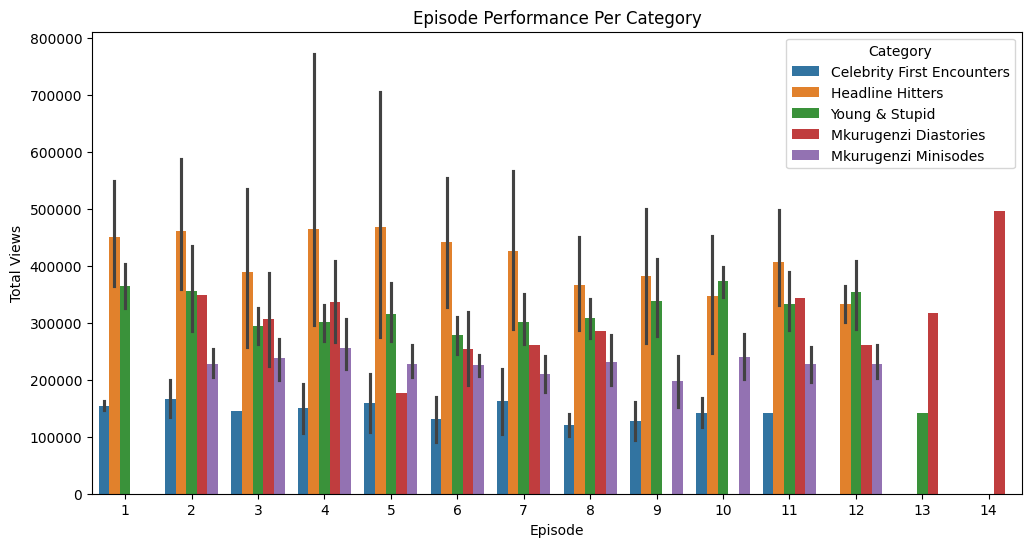

In [64]:
#visualize the results of episode

plt.figure(figsize=(12,6))
sns.barplot(data=episode_perf, x='Episode', y='Views', hue='Category')
plt.title('Episode Performance Per Category')
plt.xlabel('Episode')
plt.ylabel('Total Views')
plt.legend(title='Category')
plt.show()

In [65]:
# Top performing

top_episodes = df.sort_values(by='Views', ascending=False).head(10)
print('Top Episodes by Views')
print(top_episodes[['Title_Name', 'Category','Views']])

Top Episodes by Views
                                            Title_Name          Category  \
337                                 The Three Man Army  Headline Hitters   
361                                               1982  Headline Hitters   
340                                The Barefoot Bandit  Headline Hitters   
86                                        The War Dogs  Headline Hitters   
353                           Two Countries, One Siege  Headline Hitters   
73                        Prison Break: William Leslie  Headline Hitters   
137                        Kenya’s Most Wanted Cousins  Headline Hitters   
118  The Incredible Story Of A Special Operations W...  Headline Hitters   
382                              Silencing A Statesman  Headline Hitters   
386                             Garissa College Attack  Headline Hitters   

       Views  
337  1373998  
361  1191033  
340   897265  
86    746829  
353   745372  
73    735409  
137   719048  
118   690879  
382   

- The Three Man Army of Headline hitters is the most watched episode on this channel with over 1.3m views.
- The second most watched episode is the 1982 Six Hours of Take Over with over 1.1m views
-  Headline Hitters has the top ten most watched episodes.
- Seems fans are more interested in terror stories from the look of the top performing episodes


**Performance over Time**

In [66]:
#Performance of categories over time
df['Year_Month'] = df['Time Posted'].dt.to_period('M').astype(str)

In [67]:
df.head(2)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted,Views_capped,Year_Month
0,The Football War,Headline Hitters,9,9,82837,3512,373,00:35:28,2025-02-02,82837,2025-02
1,Dust Is Constant,Mkurugenzi Minisodes,8,9,128020,4407,455,00:19:05,2025-01-29,128020,2025-01


In [68]:
#Monthly performance

monthly_performance =  df.groupby(['Category', 'Year_Month'])[['Views', 'Likes', 'Comment']].agg('sum').reset_index()
monthly_performance =monthly_performance.sort_values(by='Year_Month')

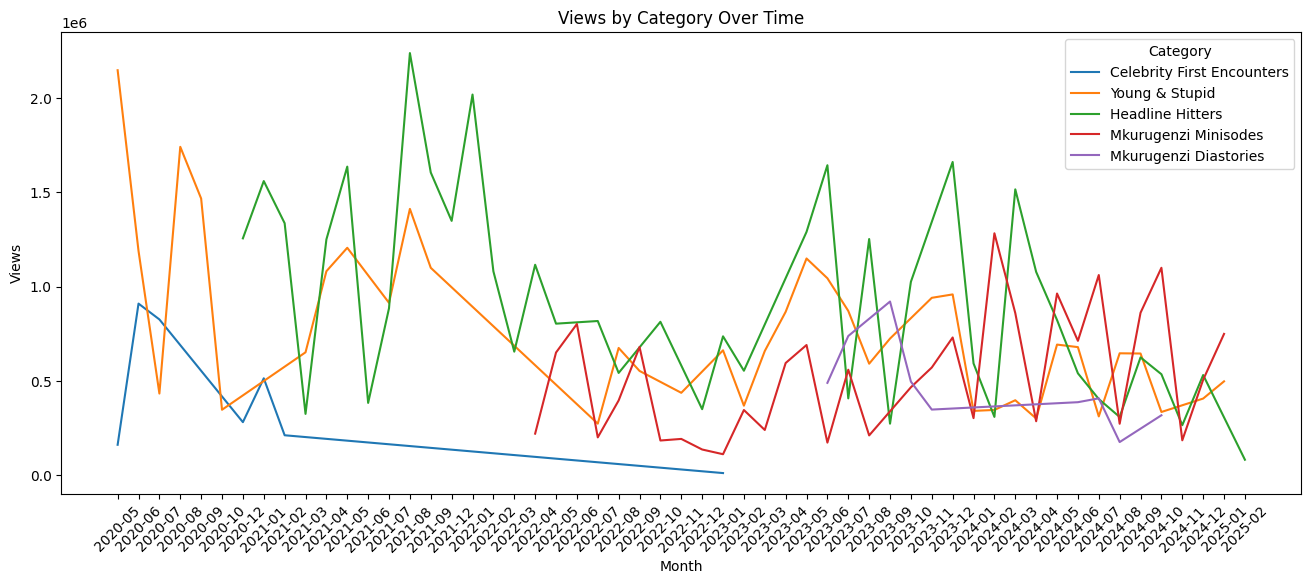

In [69]:
#Visualize monthly performance by category (Views)
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_performance, x ='Year_Month', y ='Views', hue='Category')
plt.title('Views by Category Over Time')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Views')
plt.show()

- There was a spike in Views in 2020 and 2021. Most likely because of COVID-19
- By keenly observing these line graphs, the channel is mostly watched during holiday periods, eg. April (Easter), November & December (Christmas holiday) because most spikes are around that time.

**Duration**

In [70]:
# Convert time to seconds
def time_in_seconds (t):
  if pd.isnull(t):
   return None
  if isinstance(t, datetime.time):
    return t.hour*3600 + t.minute*60+t.second
  try:
    return pd.to_timedelta(t).total_seconds()
  except:
    return None

In [71]:
df['Video_Length'] = df['Duration'].apply(time_in_seconds)

In [72]:
df.head(2)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted,Views_capped,Year_Month,Video_Length
0,The Football War,Headline Hitters,9,9,82837,3512,373,00:35:28,2025-02-02,82837,2025-02,2128
1,Dust Is Constant,Mkurugenzi Minisodes,8,9,128020,4407,455,00:19:05,2025-01-29,128020,2025-01,1145


In [73]:
# Use qcut to divide the duration in categories
df['Duration_Category'] = pd.qcut(df['Video_Length'], q=3, labels=['Short', 'Moderate', 'Long'])

In [74]:
df.sample(2)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted,Views_capped,Year_Month,Video_Length,Duration_Category
92,How To Ignore Red Flags,Young & Stupid,7,12,346719,7634,992,00:42:16,2024-02-11,346719,2024-02,2536,Long
167,Formless In Dubai,Young & Stupid,6,8,337785,6057,470,00:41:39,2023-06-02,337785,2023-06,2499,Long


In [75]:
# Duration category distribution
df.groupby('Duration_Category')['Views'].agg('sum').reset_index().sort_values(by='Views', ascending=False)

,Duration_Category,Views
2,Long,40416666
1,Moderate,31354250
0,Short,21340140


In [76]:
#Likes
df.groupby('Duration_Category')['Likes'].agg('sum').reset_index().sort_values(by='Likes', ascending=False)

,Duration_Category,Likes
2,Long,811939
1,Moderate,758399
0,Short,633574


In [77]:
#Comments
df.groupby('Duration_Category')['Comment'].agg('sum').reset_index().sort_values(by='Comment', ascending=False)

,Duration_Category,Comment
2,Long,66330
1,Moderate,63866
0,Short,53434


- It appears that relatively long videos have higher numbers but it is subject to an hypothesis testing

# **4. Hypothesis Testing**

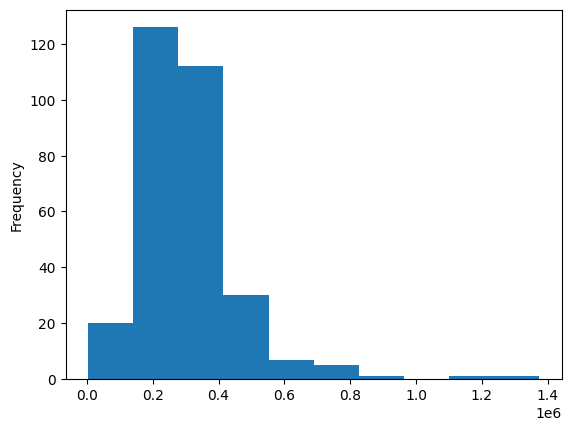

In [78]:
# We using Views to test our hypothesis. Lets cehck the normality of views


df['Views'].plot(kind='hist')
plt.show()

- We note that the data is not normaly distributed
- So next step is to normalize it

In [79]:
# Normaize usin Box cox
from scipy.stats import boxcox

df['Views_Transformed'], fitted_lambda = boxcox(df['Views'])

In [80]:
df.head(2)

,Title_Name,Category,Season,Episode,Views,Likes,Comment,Duration,Time Posted,Views_capped,Year_Month,Video_Length,Duration_Category,Views_Transformed
0,The Football War,Headline Hitters,9,9,82837,3512,373,00:35:28,2025-02-02,82837,2025-02,2128,Long,377.32
1,Dust Is Constant,Mkurugenzi Minisodes,8,9,128020,4407,455,00:19:05,2025-01-29,128020,2025-01,1145,Short,460.43


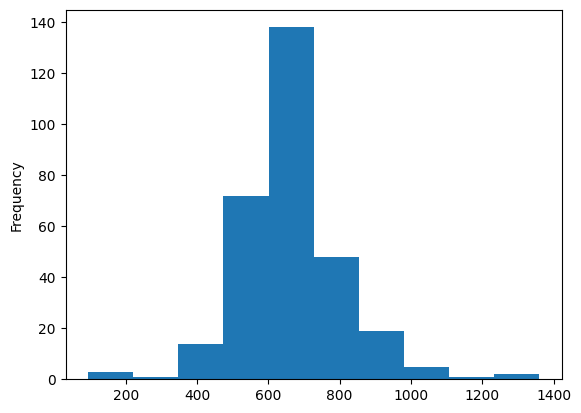

In [81]:
#check the normality again
df['Views_Transformed'].plot(kind='hist')
plt.show()

**Is the length of a video statistically significant in the viewership of YouTube videos in this channel?**



**Null Hypothesis (H₀)**


H0:There is no significant statistical difference in the length of videos on the number of total views

**Alternative Hypothesis (H₁)**


H₁: There is a significant statistical difference in the length of videos on the number of total views


**Alpha: 0.05**

In [82]:
from scipy.stats import f_oneway

In [83]:
#prepare video length for test
data_list = []
for length in df['Video_Length'].unique():
  unique_data = df[df['Video_Length']==length]['Views_Transformed']
  unique_data_list = unique_data.to_list()
  data_list.append(unique_data_list)

In [84]:
#Anova test

stats, p_value = f_oneway(*data_list)
print(f'Stats: {stats}\np_value: {p_value}')

Stats: 2.6744778672711425
p_value: 0.012618443084245952


In [85]:
0.012618443084245952 < 0.05

True

In [86]:
# interpret hypothesis results

alpha = 0.05

print('Intepretation')

if p_value > alpha:
  print('Reject null hypothesis')
else:
  print('Reject alternative hypothesis')

Intepretation
Reject alternative hypothesis


- The F-Statistic of 2.67 indicates that there is some  variability in between the three groups (Short, Moderate, Long)

- The p_value of  0.012618443084245952 is less than alpha value of 0.05 indicating that we fail to reject the null hypothesis but instead reject the alternative hypothesis

- The alternative hypothesis indicates that there is a significant statistical difference in the length of videos on the number of total views

**Conclusion**

- The hypothesis results indicate that people watch content they love with little or no consideration of the length of the video.

# **Conclusion**

- From time series analysis, there are sharp peaks especially during holiday periods in Kenya. It could be interpreted that most people watch videos in this channel around holiday periods. There was a sharp increase of viewer engagement between Sep 2020, through to 2021 due to COVID-19 which pushed people to seek alternative means of entertainment.
- Hypothesis testing results show that the duration of a video does not affect viewership of these videos. Relatively longer period videos had more views than the short videos holding other factors constant.

**Challenges**
- Some videos were not in the right format for analysis and therefore were dropped.  


**Recommendation**
- The YouTuber and his management should consider ensuring that all the videos are posted with a consistent format to enable a comprehensive analysis.
- Please note that all trailers and behind the scenes videos were not used for this analysis.